In [7]:
import numpy as np

from matplotlib import pyplot as plt

In [8]:
data = np.loadtxt("Arnoldi_basis.dat")

q0 = data[:, 0]
A = data[:, 1:]

data = np.loadtxt("eig_basis.dat")

Aeig = data[:, 1:]
Aeig_r = Aeig[:, :int(Aeig.shape[1] / 2)]
Aeig_i = Aeig[:, int(Aeig.shape[1] / 2):]

N = int(len(q0) / 2)

data = np.loadtxt("results.dat")

ts = data[:, 0]
phis = data[:, 1:].T

dof_dict = {
    'u' : 0,
    'v' : 1,
    'w' : 2,
    'thx' : 3,
    'thy' : 4,
    'thz' : 5
}

def get_history(ipt, dof = 'w'):
    return A[6 * ipt + dof_dict[dof], :] @ phis

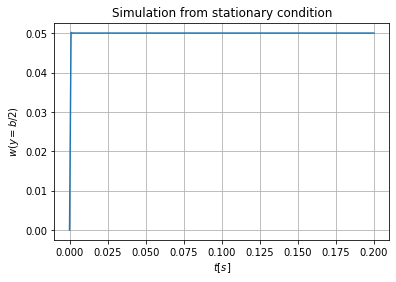

In [9]:
plt.plot(ts, get_history(0, dof = 'w'))

plt.xlabel('$t [s]$')
plt.ylabel('$w (y = b / 2)$')

plt.title('Simulation from stationary condition')

plt.grid()

plt.show()

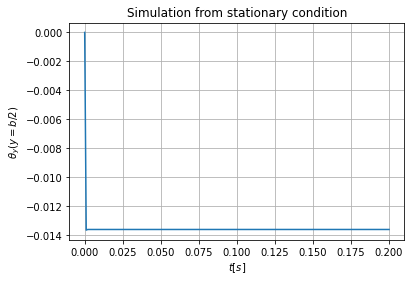

In [10]:

plt.plot(ts, get_history(0, dof = 'thy'))

plt.xlabel('$t [s]$')
plt.ylabel(r'$\theta_y (y = b / 2)$')

plt.title('Simulation from stationary condition')

plt.grid()

plt.show()

In [11]:
def plot_eig(i, fname = "assumed_eigs.dat", threshold = 40.0 * np.pi * 2):
    eigs = np.loadtxt(fname)

    phi_re = eigs[:, :int((eigs.shape[1] - 2) / 2)]
    phi_im = eigs[:, int((eigs.shape[1] - 2) / 2):]

    rlambda = eigs[:, -2]
    ilambda = eigs[:, -1]

    imv = Aeig_r @ phi_im[:, i] + Aeig_i @ phi_re[:, i]
    rev = Aeig_r @ phi_re[:, i] - Aeig_i @ phi_im[:, i]

    ui = imv[0:N:6]
    ur = rev[0:N:6]

    vi = imv[1:N:6]
    vr = rev[1:N:6]

    wi = imv[2:N:6]
    wr = rev[2:N:6]

    thxi = imv[3:N:6]
    thxr = rev[3:N:6]

    thyi = imv[4:N:6]
    thyr = rev[4:N:6]

    thzi = imv[5:N:6]
    thzr = rev[5:N:6]

    y = q0[1:N:6]

    if np.sqrt(rlambda[i] ** 2 + ilambda[i] ** 2) < threshold:
        """
        plt.plot(y, ur, label = "Re(u)")
        plt.plot(y, ui, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel("u")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()

        plt.plot(y, vr, label = "Re(u)")
        plt.plot(y, vi, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel("v")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()
        """

        plt.plot(y, wr, label = "Re(u)")
        plt.plot(y, wi, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel("w")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()

        """
        plt.plot(y, thxr, label = "Re(u)")
        plt.plot(y, thxi, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel(r"$\theta_x$")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()
        """

        plt.plot(y, thyr, label = "Re(u)")
        plt.plot(y, thyi, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel(r"$\theta_y$")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()

        """
        plt.plot(y, thzr, label = "Re(u)")
        plt.plot(y, thzi, label = "Im(u)")

        plt.xlabel("y")
        plt.ylabel(r"$\theta_z$")

        plt.title("Mode " + str(i) + ", " + r"$\lambda = $" + str(rlambda[i]) + "+" + str(ilambda[i]) + "i")

        plt.legend()

        plt.show()
        """

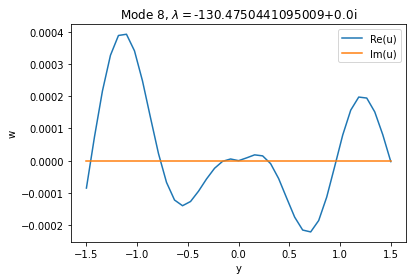

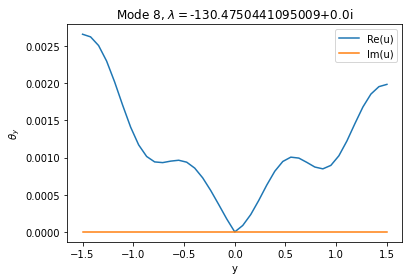

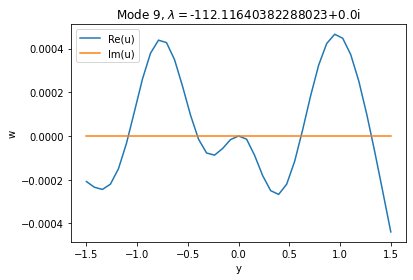

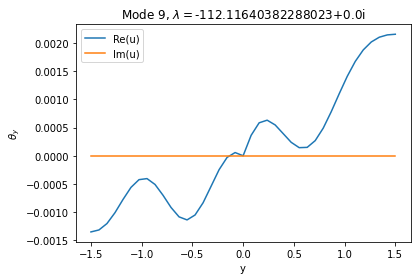

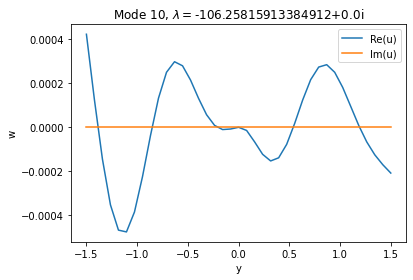

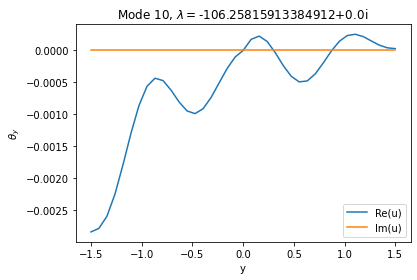

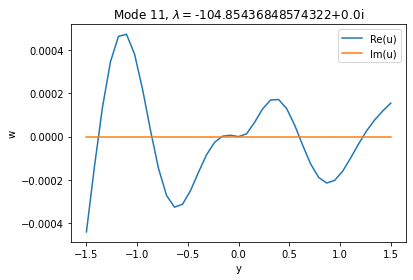

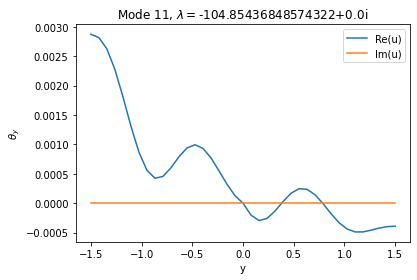

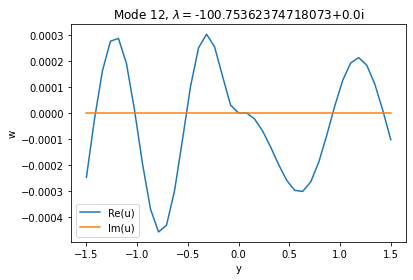

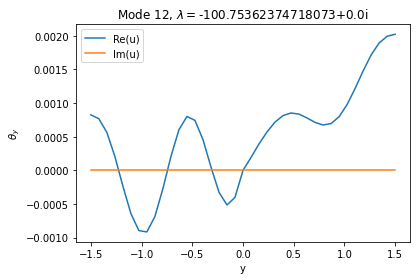

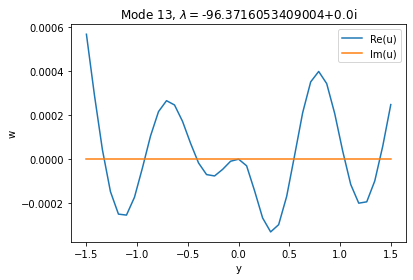

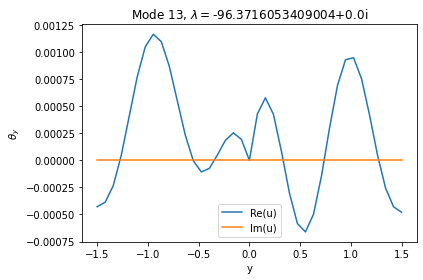

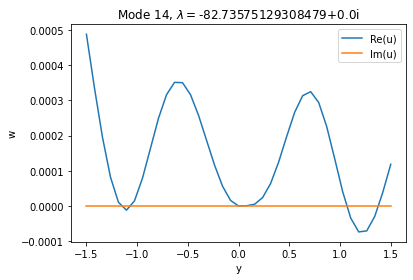

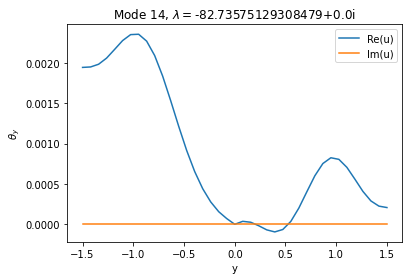

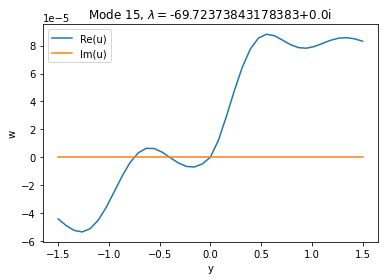

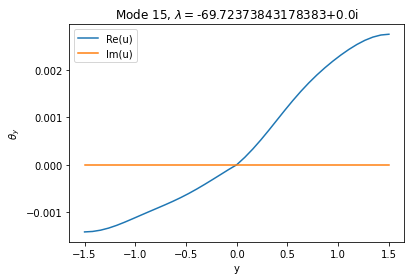

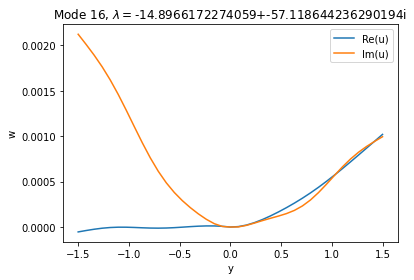

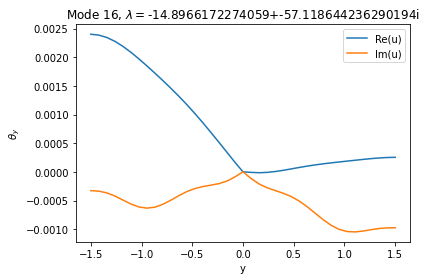

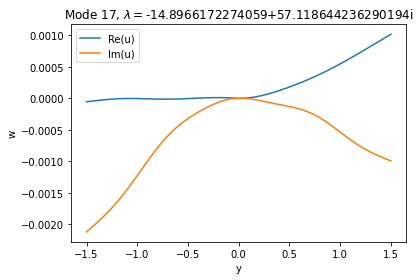

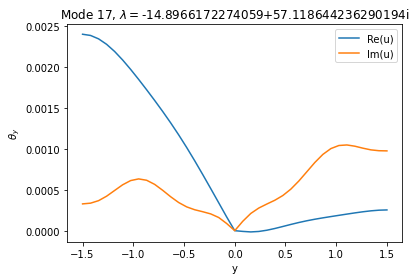

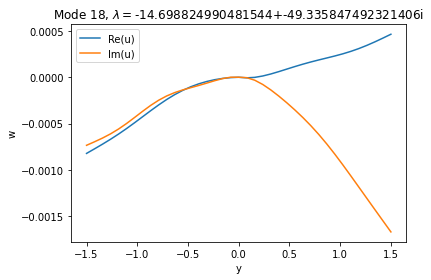

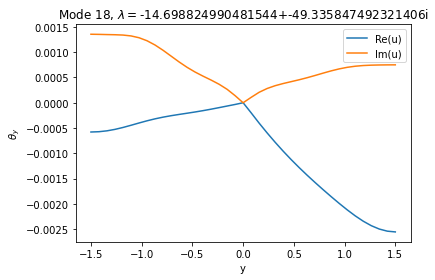

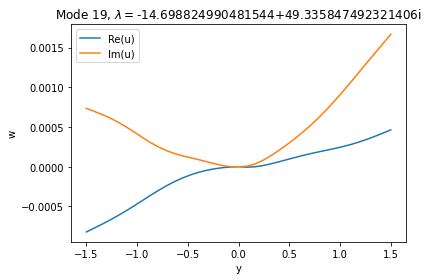

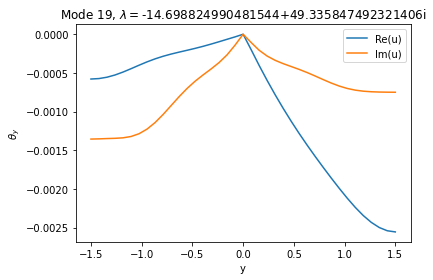

In [12]:
for i in range(20):
    plot_eig(i)